In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dython import nominal
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import pickle 
import statsmodels
from scipy import stats

In [2]:
results_dir = './data/results/'

In [3]:
results_df = pd.read_excel(results_dir+'human_eval.xlsx')

In [4]:
results_df

,ID,Start time,Completion time,What is your age group?,Have you ever heard of artificial intelligence (AI)?,Have you ever worked on a project related to AI?,Have you ever heard of explainable AI (XAI)?,Explanation,Explanation2,Explanation3,...,Explanation15,Explanation16,Explanation17,Explanation18,Explanation19,Explanation20,Explanation21,Explanation22,Explanation23,Explanation24
0,2,2022-04-17 13:25:20,2022-04-17 13:43:26,26-35,Yes,No,Yes,Very Bad,Bad,Very good,...,Very good,Very Bad,Very Bad,2.1.3,Very Bad,Bad,Very good,Very Bad,Very Bad,2.2.3
1,3,2022-04-17 12:10:20,2022-04-17 13:53:27,18-25,Yes,No,No,Very Bad,Bad,Good,...,Very good,Bad,Good,2.1.3,Neither bad nor good,Bad,Very good,Very good,Good,2.2.3
2,4,2022-04-17 13:37:39,2022-04-17 14:10:01,18-25,Yes,No,No,Neither bad nor good,Bad,Good,...,Very good,Very good,Neither bad nor good,2.1.3,Very good,Good,Good,Very good,Neither bad nor good,2.2.4
3,5,2022-04-17 17:42:19,2022-04-17 17:52:22,18-25,Yes,Yes,Yes,Good,Bad,Good,...,Good,Good,Good,2.1.4,Good,Neither bad nor good,Good,Good,Good,2.2.4
4,6,2022-04-17 19:24:05,2022-04-17 19:26:02,18-25,Yes,Yes,Yes,Bad,Good,Very good,...,Very good,Very good,Good,2.1.4,Very good,Very good,Very good,Very good,Very good,2.2.4
5,7,2022-04-18 11:05:09,2022-04-18 11:47:52,18-25,Yes,No,Yes,Good,Bad,Bad,...,Good,Bad,Neither bad nor good,2.1.3,Good,Neither bad nor good,Very good,Very good,Bad,2.2.3
6,8,2022-04-18 10:45:22,2022-04-18 12:12:38,18-25,Yes,No,No,Very Bad,Very Bad,Good,...,Bad,Bad,Good,2.1.3,Good,Good,Good,Very good,Very good,2.2.3
7,9,2022-04-18 11:47:52,2022-04-18 13:00:17,18-25,Yes,Yes,Yes,Bad,Good,Very good,...,Very good,Very good,Neither bad nor good,2.1.3,Good,Neither bad nor good,Very good,Very good,Very good,2.2.3
8,10,2022-04-18 14:49:48,2022-04-18 15:06:46,18-25,Yes,No,No,Bad,Bad,Good,...,Good,Neither bad nor good,Neither bad nor good,2.1.3,Good,Neither bad nor good,Good,Good,Good,2.2.3
9,11,2022-04-18 15:29:33,2022-04-18 15:43:18,18-25,Yes,Yes,Yes,Good,Very good,Very good,...,Good,Good,Good,2.1.3,Good,Good,Good,Good,Very good,2.2.3


In [5]:
replace_dict = {'Very Bad': 1,
                'Bad': 2,
                'Neither bad nor good': 3,
                'Good': 4,
                'Very good': 5}

In [6]:
replace_dict_1 = {'1.1.1': '1',
                  '1.1.2': '2',
                  '1.1.3': '3',
                  '1.1.4': '4',
                  '1.1.5': '5'}

In [7]:
replace_dict_2 = {'1.2.1': '1',
                  '1.2.2': '2',
                  '1.2.3': '3',
                  '1.2.4': '4',
                  '1.2.5': '5'}

In [8]:
replace_dict_3 = {'2.1.1': '1',
                  '2.1.2': '2',
                  '2.1.3': '3',
                  '2.1.4': '4',
                  '2.1.5': '5'}

In [9]:
replace_dict_4 = {'2.2.1': '1',
                  '2.2.2': '2',
                  '2.2.3': '3',
                  '2.2.4': '4',
                  '2.2.5': '5'}

In [10]:
filtered_df = results_df.drop(['ID', 'Start time', 'Completion time', 'What is your age group?', 'Have you ever heard of artificial intelligence (AI)?', 'Have you ever worked on a project related to AI?', 'Have you ever heard of explainable AI (XAI)?'], axis=1).transpose()

In [11]:
filtered_df.iloc[5:6,:]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Explanation6,1.1.3,1.1.3,1.1.3,1.1.3,1.1.4,1.1.4,1.1.4,1.1.3,1.1.4,1.1.3,...,1.1.3,1.1.3,1.1.3,1.1.4,1.1.3,1.1.3,1.1.3,1.1.4,1.1.3,1.1.3


In [12]:
filtered_df.to_csv(results_dir+'transposed_df.csv')

---

## Fleiss Kappa

In [13]:
# Adapted from https://gist.github.com/ShinNoNoir/4749548
def fleiss_kappa(ratings, n):
    '''
    Computes the Fleiss' kappa measure for assessing the reliability of 
    agreement between a fixed number n of raters when assigning categorical
    ratings to a number of items.
    
    Args:
        ratings: a list of (item, category)-ratings
        n: number of raters
        k: number of categories
    Returns:
        the Fleiss' kappa score
    
    See also:
        http://en.wikipedia.org/wiki/Fleiss'_kappa
    '''
    items = set()
    categories = set()
    n_ij = {}
    
    for i, c in ratings:
        items.add(i)
        categories.add(c)
        n_ij[(i,c)] = n_ij.get((i,c), 0) + 1
    
    N = len(items)
    
    p_j = dict(((c, sum(n_ij.get((i, c), 0) for i in items) / (1.0 * n * N)) for c in categories))
    P_i = dict(((i, (sum(n_ij.get((i, c), 0) ** 2 for c in categories) - n) / (n * (n - 1.0))) for i in items))

    P_bar = sum(P_i.values()) / (1.0 * N)
    P_e_bar = sum(value ** 2 for value in p_j.values())
    
    kappa = (P_bar - P_e_bar) / (1 - P_e_bar)
    
    return kappa

In [14]:
questions = [[7, 13, 19, 25],
             [8, 14, 20, 26],
             [9, 15, 21, 27],
             [10, 16, 22, 28], 
             [11, 17, 23, 29], 
             [12, 18, 24, 30]]

In [15]:
for question_type in range(len(questions)):
    answers = []
    for i in questions[question_type]:
        for column in range(30):
            answers.append((i, results_df.iloc[column,i]))
    print('Fleiss kappa is: ', fleiss_kappa(answers, 30))

Fleiss kappa is:  0.02126553056008321
Fleiss kappa is:  0.07096573733032109
Fleiss kappa is:  0.05741687125892853
Fleiss kappa is:  0.12267983422013708
Fleiss kappa is:  0.024050999710228938
Fleiss kappa is:  0.4150706488066191


-----------

## Shapiro-Wilk

In [16]:
results_df = results_df.replace(replace_dict)
results_df = results_df.replace(replace_dict_1)
results_df = results_df.replace(replace_dict_2)
results_df = results_df.replace(replace_dict_3)
results_df = results_df.replace(replace_dict_4)

In [17]:
results_df.iloc[:,7].values

array([1, 1, 3, 4, 2, 4, 1, 2, 2, 4, 2, 4, 2, 3, 4, 2, 1, 2, 1, 1, 2, 3,
       1, 1, 3, 2, 3, 3, 2, 3], dtype=int64)

In [18]:
questions_two = [[7, 19], [13, 25],
                 [8, 20], [14, 26],
                 [9, 21], [15, 27],
                 [10, 22], [16, 28], 
                 [11, 23], [17, 29], 
                 [12, 24], [18, 30]]

In [19]:
for question_pair in questions_two:
    data = np.concatenate((results_df.iloc[:,question_pair[0]].values, results_df.iloc[:,question_pair[1]].values))
    shapiro_test = stats.shapiro(data)
    print('Result is: ', shapiro_test.statistic, ' and p-value is: ', shapiro_test.pvalue)

Result is:  0.8977057337760925  and p-value is:  0.00010861604823730886
Result is:  0.8857446908950806  and p-value is:  4.1349561797687784e-05
Result is:  0.8679125905036926  and p-value is:  1.0734240277088247e-05
Result is:  0.8882561922073364  and p-value is:  5.042620250605978e-05
Result is:  0.8485623598098755  and p-value is:  2.7635248898150166e-06
Result is:  0.6613222360610962  and p-value is:  1.7081897007997782e-10
Result is:  0.8724643588066101  and p-value is:  1.500063717685407e-05
Result is:  0.637178897857666  and p-value is:  6.506237215653243e-11
Result is:  0.8886683583259583  and p-value is:  5.210665040067397e-05
Result is:  0.8472611904144287  and p-value is:  2.531519157855655e-06
Result is:  0.682121992111206  and p-value is:  4.074890425087574e-10
Result is:  0.6762785315513611  and p-value is:  3.179875529557563e-10


#### sample plot

In [20]:
import matplotlib.pyplot as plt


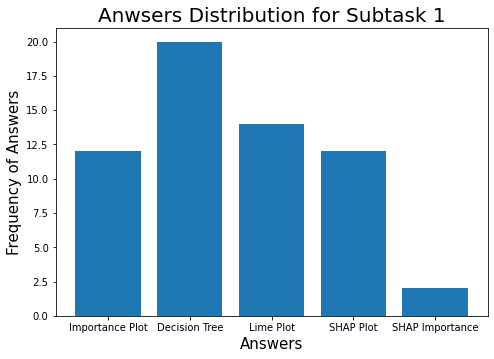

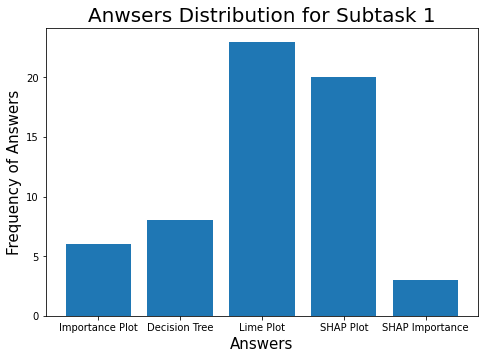

 --------------------------- 


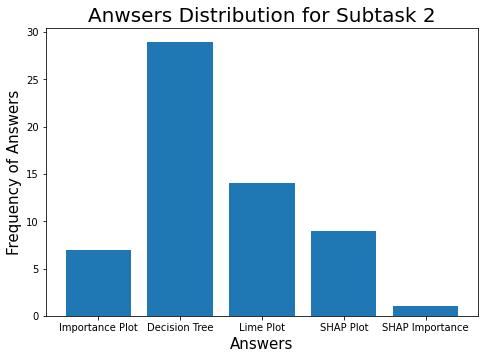

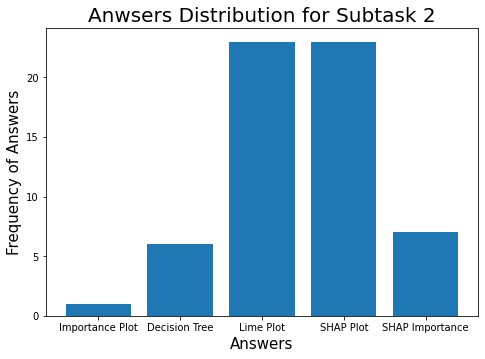

 --------------------------- 


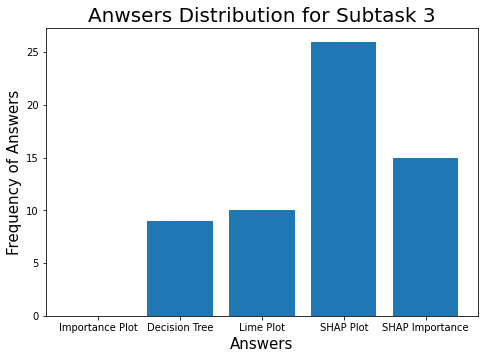

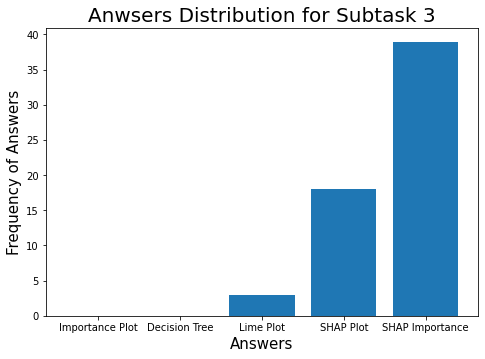

 --------------------------- 


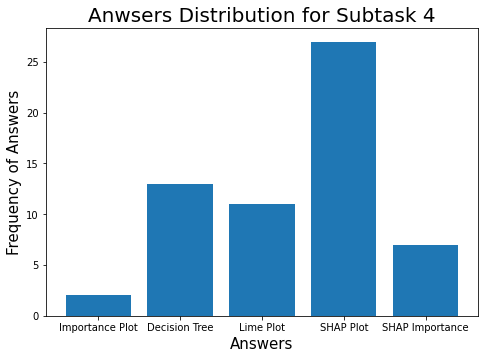

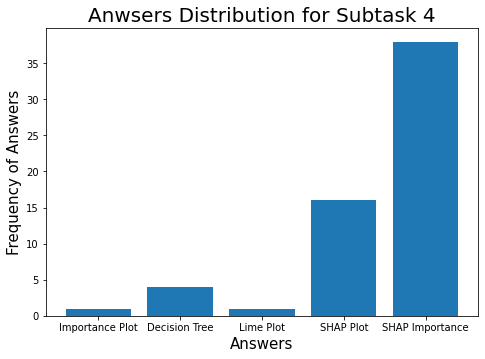

 --------------------------- 


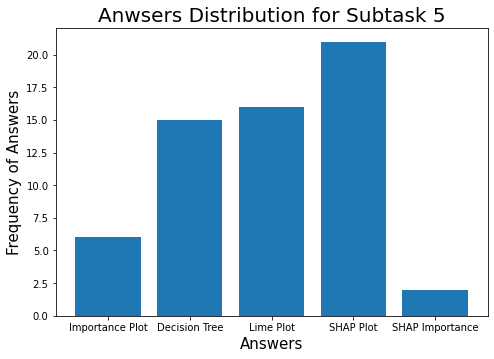

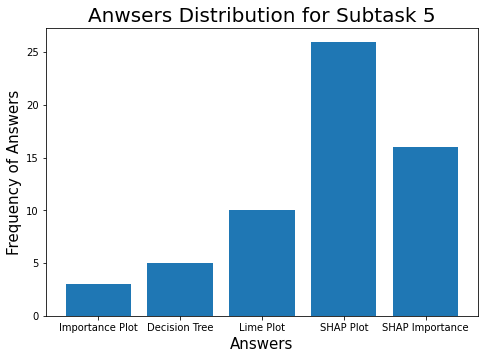

 --------------------------- 


In [22]:
count = 0
for question_pair in questions[:-1]:
    count +=1
    data_subtask_no_exp = np.concatenate((results_df.iloc[:,question_pair[0]].values, results_df.iloc[:,question_pair[2]].values))
    data_subtask_exp = np.concatenate((results_df.iloc[:,question_pair[1]].values, results_df.iloc[:,question_pair[3]].values))
   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X_labels = [i for i in range(1,6)]
    y_values = [np.count_nonzero(data_subtask_no_exp == i) for i in X_labels]
#     X_labels = ['Very Bad', 'Bad', 'Neither Good nor Bad', 'Good', 'Very Good']
    X_labels = ['Importance Plot', 'Decision Tree', 'Lime Plot', 'SHAP Plot', 'SHAP Importance']
    ax.bar(X_labels, y_values)
    ax.set_title(f'Anwsers Distribution for Subtask {count}', fontsize=20)
    ax.set_ylabel('Frequency of Answers', fontsize=15)
    ax.set_xlabel('Answers', fontsize=15)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X_labels = [i for i in range(1,6)]
    y_values = [np.count_nonzero(data_subtask_exp == i) for i in X_labels]
#     X_labels = ['Very Bad', 'Bad', 'Neither Good nor Bad', 'Good', 'Very Good']
    X_labels = ['Importance Plot', 'Decision Tree', 'Lime Plot', 'SHAP Plot', 'SHAP Importance']
    ax.bar(X_labels, y_values)
    ax.set_title(f'Anwsers Distribution for Subtask {count}', fontsize=20)
    ax.set_ylabel('Frequency of Answers', fontsize=15)
    ax.set_xlabel('Answers', fontsize=15)
    plt.show()
    
    print(' --------------------------- ')

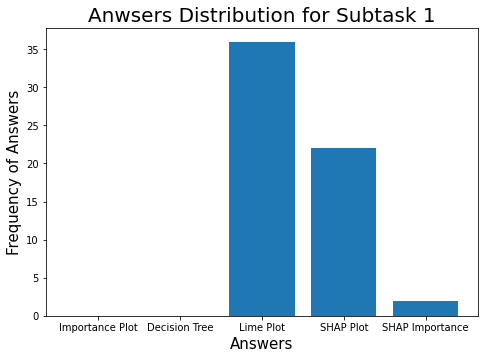

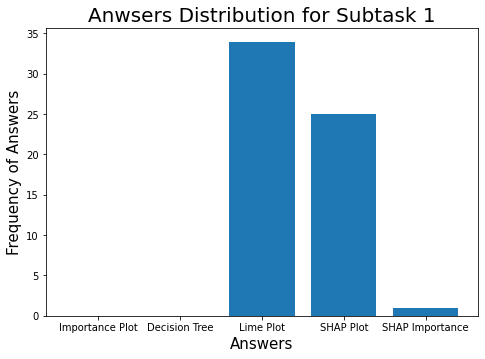

 --------------------------- 


In [26]:
count = 0
for question_pair in [questions[-1]]:
    count +=1
    data_subtask_no_exp = np.concatenate((results_df.iloc[:,question_pair[0]].values, results_df.iloc[:,question_pair[2]].values))
    data_subtask_exp = np.concatenate((results_df.iloc[:,question_pair[1]].values, results_df.iloc[:,question_pair[3]].values))
   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X_labels = [i for i in range(1,6)]
    y_values = [np.count_nonzero(data_subtask_no_exp == str(i)) for i in X_labels]
#     X_labels = ['Very Bad', 'Bad', 'Neither Good nor Bad', 'Good', 'Very Good']
    X_labels = ['Importance Plot', 'Decision Tree', 'Lime Plot', 'SHAP Plot', 'SHAP Importance']
    ax.bar(X_labels, y_values)
    ax.set_title(f'Anwsers Distribution for Subtask {count}', fontsize=20)
    ax.set_ylabel('Frequency of Answers', fontsize=15)
    ax.set_xlabel('Answers', fontsize=15)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X_labels = [i for i in range(1,6)]
    y_values = [np.count_nonzero(data_subtask_exp == str(i)) for i in X_labels]
#     X_labels = ['Very Bad', 'Bad', 'Neither Good nor Bad', 'Good', 'Very Good']
    X_labels = ['Importance Plot', 'Decision Tree', 'Lime Plot', 'SHAP Plot', 'SHAP Importance']
    ax.bar(X_labels, y_values)
    ax.set_title(f'Anwsers Distribution for Subtask {count}', fontsize=20)
    ax.set_ylabel('Frequency of Answers', fontsize=15)
    ax.set_xlabel('Answers', fontsize=15)
    plt.show()
    
    print(' --------------------------- ')

----------

## mann-whitney

In [30]:
for i in range(len(questions_two)//2-1):
    data_1 = np.concatenate((results_df.iloc[:,questions_two[i*2][0]].values, results_df.iloc[:,questions_two[i*2][1]].values))
    data_2 = np.concatenate((results_df.iloc[:,questions_two[i*2+1][0]].values, results_df.iloc[:,questions_two[i*2+1][1]].values))
    mean_1 = data_1.mean()
    mean_2 = data_2.mean()
    U1, p = stats.mannwhitneyu(data_1, data_2, method="exact")
    print('P value is: ', p)
    print('Mean 1 is: ', mean_1, 'Mean 2 is: ', mean_2)

P value is:  0.005525298682862616
Mean 1 is:  2.533333333333333 Mean 2 is:  3.1
P value is:  7.472590042417587e-08
Mean 1 is:  2.466666666666667 Mean 2 is:  3.4833333333333334
P value is:  3.341315715132868e-06
Mean 1 is:  3.783333333333333 Mean 2 is:  4.6
P value is:  1.7525492691939806e-08
Mean 1 is:  3.4 Mean 2 is:  4.433333333333334
P value is:  7.1121064470951e-05
Mean 1 is:  2.966666666666667 Mean 2 is:  3.783333333333333


### subtask 1 vs others

### Anova

In [31]:
from scipy.stats import f_oneway

In [32]:
data_1 = np.concatenate((results_df.iloc[:,7].values, results_df.iloc[:,13].values, results_df.iloc[:,19].values, results_df.iloc[:,25].values))
data_2 = np.concatenate((results_df.iloc[:,8].values, results_df.iloc[:,14].values, results_df.iloc[:,20].values, results_df.iloc[:,26].values))
data_3 = np.concatenate((results_df.iloc[:,9].values, results_df.iloc[:,15].values, results_df.iloc[:,21].values, results_df.iloc[:,27].values))
data_4 = np.concatenate((results_df.iloc[:,10].values, results_df.iloc[:,16].values, results_df.iloc[:,22].values, results_df.iloc[:,28].values))
data_5 = np.concatenate((results_df.iloc[:,11].values, results_df.iloc[:,17].values, results_df.iloc[:,23].values, results_df.iloc[:,29].values))

In [33]:
F, p = f_oneway(data_1, data_2, data_3, data_4, data_5)

In [34]:
F

36.38962906337593

In [35]:
p

3.1565385126312508e-27

-------

In [36]:
questions

[[7, 13, 19, 25],
 [8, 14, 20, 26],
 [9, 15, 21, 27],
 [10, 16, 22, 28],
 [11, 17, 23, 29],
 [12, 18, 24, 30]]

In [37]:
questions_three = [[8, 14, 20, 26],
                   [9, 15, 21, 27],
                   [10, 16, 22, 28],
                   [11, 17, 23, 29]]

In [40]:
data_1 = np.concatenate((results_df.iloc[:,7].values, results_df.iloc[:,13].values, results_df.iloc[:,19].values, results_df.iloc[:,25].values))
mean_1 = data_1.mean()
for question in questions_three:
    data_2 = np.concatenate((results_df.iloc[:,question[0]].values, results_df.iloc[:,question[1]].values, results_df.iloc[:,question[2]].values, results_df.iloc[:,question[3]].values))
    mean_2 = data_2.mean()
    U1, p = stats.mannwhitneyu(data_1, data_2, method="exact")
    print('P value is: ', p)
    print('Mean 1 is: ', mean_1, 'Mean 2 is: ', mean_2)

P value is:  0.3492713873865476
Mean 1 is:  2.816666666666667 Mean 2 is:  2.975
P value is:  7.117485029658169e-19
Mean 1 is:  2.816666666666667 Mean 2 is:  4.191666666666666
P value is:  1.6922260995556727e-12
Mean 1 is:  2.816666666666667 Mean 2 is:  3.9166666666666665
P value is:  0.0001581837340117711
Mean 1 is:  2.816666666666667 Mean 2 is:  3.375


### subtask 2 vs others

In [41]:
questions_four = [[9, 15, 21, 27],
                  [10, 16, 22, 28],
                  [11, 17, 23, 29]]

In [42]:
data_1 = np.concatenate((results_df.iloc[:,8].values, results_df.iloc[:,14].values, results_df.iloc[:,20].values, results_df.iloc[:,26].values))
mean_1 = data_1.mean()
for question in questions_four:
    data_2 = np.concatenate((results_df.iloc[:,question[0]].values, results_df.iloc[:,question[1]].values, results_df.iloc[:,question[2]].values, results_df.iloc[:,question[3]].values))
    mean_2 = data_2.mean()
    U1, p = stats.mannwhitneyu(data_1, data_2, method="exact")
    print('P value is: ', p)
    print('Mean 1 is: ', mean_1, 'Mean 2 is: ', mean_2)

P value is:  4.701638840472336e-17
Mean 1 is:  2.975 Mean 2 is:  4.191666666666666
P value is:  2.2365186257890455e-10
Mean 1 is:  2.975 Mean 2 is:  3.9166666666666665
P value is:  0.003955946557483186
Mean 1 is:  2.975 Mean 2 is:  3.375


### subtask 3 vs others

In [46]:
questions_five = [[10, 16, 22, 28],
                  [11, 17, 23, 29]]

In [45]:
data_1 = np.concatenate((results_df.iloc[:,9].values, results_df.iloc[:,15].values, results_df.iloc[:,21].values, results_df.iloc[:,27].values))
mean_1 = data_1.mean()
for question in questions_five:
    data_2 = np.concatenate((results_df.iloc[:,question[0]].values, results_df.iloc[:,question[1]].values, results_df.iloc[:,question[2]].values, results_df.iloc[:,question[3]].values))
    mean_2 = data_2.mean()
    U1, p = stats.mannwhitneyu(data_1, data_2, method="exact")
    print('P value is: ', p)
    print('Mean 1 is: ', mean_1, 'Mean 2 is: ', mean_2)

P value is:  0.08820463717736518
Mean 1 is:  4.191666666666666 Mean 2 is:  3.9166666666666665
P value is:  7.874321624105586e-09
Mean 1 is:  4.191666666666666 Mean 2 is:  3.375


### Chi-sq

In [47]:
questions

[[7, 13, 19, 25],
 [8, 14, 20, 26],
 [9, 15, 21, 27],
 [10, 16, 22, 28],
 [11, 17, 23, 29],
 [12, 18, 24, 30]]

In [48]:
data = np.concatenate((results_df.iloc[:,12].values, results_df.iloc[:,18].values, results_df.iloc[:,24].values, results_df.iloc[:,30].values))

In [49]:
data

array(['3', '3', '3', '3', '4', '4', '4', '3', '4', '3', '3', '4', '5',
       '3', '4', '3', '3', '3', '3', '3', '3', '3', '3', '4', '3', '3',
       '3', '4', '3', '3', '3', '3', '3', '3', '4', '3', '4', '3', '4',
       '3', '3', '4', '4', '3', '4', '5', '4', '3', '3', '4', '3', '3',
       '4', '3', '4', '4', '4', '4', '3', '3', '3', '3', '3', '4', '4',
       '3', '3', '3', '3', '3', '5', '4', '4', '3', '3', '3', '4', '4',
       '4', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '3', '3',
       '3', '4', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '4', '4', '3', '3', '3', '3', '4', '4', '4', '4', '4',
       '4', '4', '3'], dtype=object)

In [50]:
data = [np.count_nonzero(data == str(i)) for i in range(1,6)]

In [51]:
data

[0, 0, 70, 47, 3]

In [52]:
stats.chisquare(data)

Power_divergenceResult(statistic=176.58333333333334, pvalue=4.038567053138933e-37)

1, 2 vs others

In [57]:
stats.chisquare([0,70])

Power_divergenceResult(statistic=70.0, pvalue=5.930445850082478e-17)

In [58]:
stats.chisquare([0,47])

Power_divergenceResult(statistic=47.0, pvalue=7.098670445201034e-12)

In [59]:
stats.chisquare([0,3])

Power_divergenceResult(statistic=3.0, pvalue=0.08326451666355042)

3 vs others

In [61]:
stats.chisquare([70,47])

Power_divergenceResult(statistic=4.521367521367521, pvalue=0.033474065109133526)

In [62]:
stats.chisquare([70,3])

Power_divergenceResult(statistic=61.49315068493151, pvalue=4.442859946816926e-15)

4 vs others

In [63]:
stats.chisquare([47,3])

Power_divergenceResult(statistic=38.72, pvalue=4.891710270605896e-10)

-----

In [34]:
xai_df = results_df[results_df['Have you ever heard of explainable AI (XAI)?']=='Yes']

In [35]:
nonxai_df = results_df[~(results_df['Have you ever heard of explainable AI (XAI)?']=='Yes')]

In [36]:
questions

[[7, 13, 19, 25],
 [8, 14, 20, 26],
 [9, 15, 21, 27],
 [10, 16, 22, 28],
 [11, 17, 23, 29],
 [12, 18, 24, 30]]

In [37]:
data_xai = []
data_nonxai = []
for question_in in range(len(questions)-1):
    data_xai = np.concatenate((data_xai, xai_df.iloc[:,questions[question_in][0]].values, xai_df.iloc[:,questions[question_in][1]].values, xai_df.iloc[:,questions[question_in][2]].values, xai_df.iloc[:,questions[question_in][3]].values))
    data_nonxai = np.concatenate((data_nonxai, nonxai_df.iloc[:,questions[question_in][0]].values, nonxai_df.iloc[:,questions[question_in][1]].values, nonxai_df.iloc[:,questions[question_in][2]].values, nonxai_df.iloc[:,questions[question_in][3]].values))

In [38]:
data_nonxai.shape

(240,)

In [39]:
data_xai.shape

(360,)

In [40]:
mean_1 = data_xai.mean()
mean_2 = data_nonxai.mean()
U, p = stats.mannwhitneyu(data_xai, data_nonxai)
print('P value is: ', p)
print('Mean 1 is: ', mean_1, 'Mean 2 is: ', mean_2)

P value is:  0.002920806295274867
Mean 1 is:  3.5722222222222224 Mean 2 is:  3.279166666666667
